### TEMPORAL STABILITY FOR IN-SITU NETWORK STATIONS

Input contains informations from 11 in-situ stations by Date, Time, Station Code and Soil Moisture.

 the "Hourly Mean" frequency time is calculated.

The code section includes:

1. Input Data Elaboration
    * Row Selection by station
    * Group by Frequency-Time
    * Filter for 0 < SM values < 0.8
2. Data Analysis
    * TS Plot
    * Mean Relative Difference
    * STD for bias
    * RMSE

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

In [2]:
df = pd.read_csv('foggia_labels_from2018_to_2022_10.csv',index_col='DATE_TIME', parse_dates=True)

rcParams['figure.figsize'] = 18, 10
rcParams['lines.linewidth'] = 2


In [3]:
df

,Station_Name,SM
DATE_TIME,,
2018-01-01 00:00:00,fg01,49.778490
2018-01-01 00:20:00,fg01,49.727303
2018-01-01 00:40:00,fg01,49.727303
2018-01-01 01:00:00,fg01,49.727303
2018-01-01 01:20:00,fg01,49.676117
...,...,...
2022-08-02 09:20:00,z605885,0.240000
2022-08-02 09:40:00,z605885,0.242000
2022-08-02 10:00:00,z605885,0.243000


In [4]:
kk_sg1=df.loc[df['Station_Name'] == 'fg01']
kk_sg2=df.loc[df['Station_Name'] == 'fg02']
kk_sg3=df.loc[df['Station_Name'] == 'fg03']
kk_sg4=df.loc[df['Station_Name'] == 'fg04']
kk_sg5=df.loc[df['Station_Name'] == 'fg05']
kk_sg6=df.loc[df['Station_Name'] == 'fg06']
kk_sg7=df.loc[df['Station_Name'] == 'fg07']
kk_sg8=df.loc[df['Station_Name'] == 'fg08']
kk_sg9=df.loc[df['Station_Name'] == 'fg09']
kk_sg10k=df.loc[df['Station_Name'] == 'fg10']
kk_sg11k=df.loc[df['Station_Name'] == 'z605885']


In [5]:
fg1x=kk_sg1.SM/100
fg2x=kk_sg2.SM/100
fg3x=kk_sg3.SM/100
fg4x=kk_sg4.SM/100
fg5x=kk_sg5.SM/100
fg6x=kk_sg6.SM/100
fg7x=kk_sg7.SM/100
fg8x=kk_sg8.SM/100
fg9x=kk_sg9.SM/100
fg10x=kk_sg10k.SM/100
fg11x=kk_sg11k.SM

In [6]:
fd_dt_sg1 = fg1x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg2 = fg2x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg3 = fg3x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg4 = fg4x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg5 = fg5x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg6 = fg6x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg7 = fg7x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg8 = fg8x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg9 = fg9x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg10 = fg10x.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sgk = fg11x.groupby(pd.Grouper(freq='H')).mean()


In [7]:
fd_dt_sg11x=fd_dt_sg1.dropna()
fd_dt_sg22x=fd_dt_sg2.dropna()
fd_dt_sg33x=fd_dt_sg3.dropna()
fd_dt_sg44x=fd_dt_sg4.dropna()
fd_dt_sg55x=fd_dt_sg5.dropna()
fd_dt_sg66x=fd_dt_sg6.dropna()
fd_dt_sg77x=fd_dt_sg7.dropna()
fd_dt_sg88x=fd_dt_sg8.dropna()
fd_dt_sg99x=fd_dt_sg9.dropna()
fd_dt_sg10x=fd_dt_sg10.dropna()
fd_dt_sg111x=fd_dt_sgk.dropna()

In [8]:
fd_dt_sg111x

DATE_TIME
2021-06-18 08:00:00    0.249000
2021-06-18 09:00:00    0.249333
2021-06-18 10:00:00    0.252000
2021-06-18 11:00:00    0.254000
2021-06-18 12:00:00    0.255000
                         ...   
2022-08-02 06:00:00    0.235000
2022-08-02 07:00:00    0.235333
2022-08-02 08:00:00    0.237000
2022-08-02 09:00:00    0.240333
2022-08-02 10:00:00    0.244333
Name: SM, Length: 6334, dtype: float64

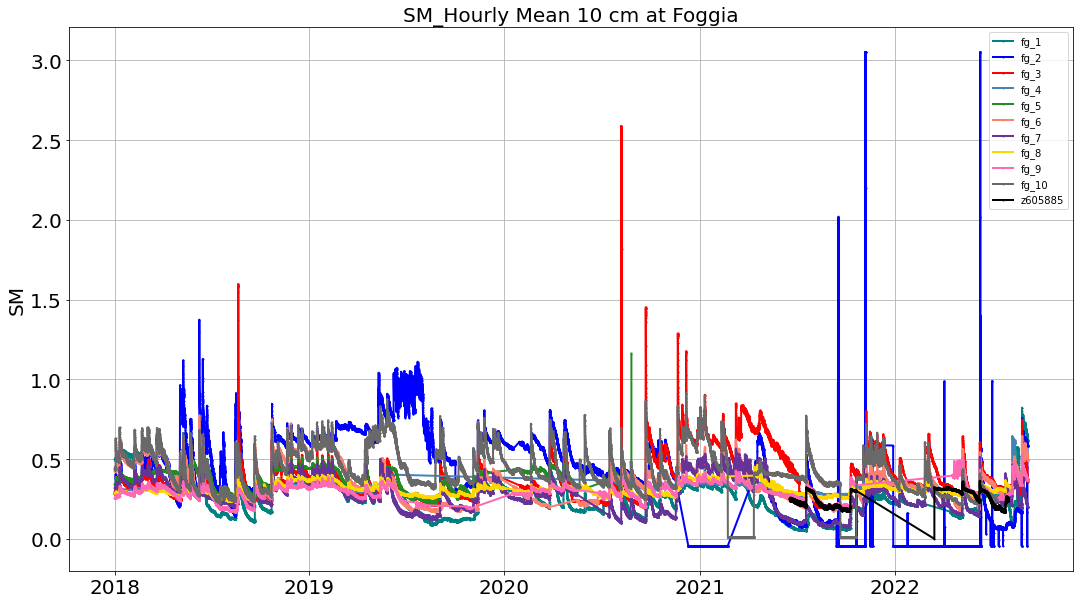

In [9]:
plt.title('SM_Hourly Mean 10 cm at Foggia', size=20)
plt.grid()
plt.plot(fd_dt_sg11x,'teal',label='fg_1',marker='o', markerfacecolor='teal', markeredgecolor='teal', markersize=1)
plt.plot(fd_dt_sg22x, 'blue',label='fg_2',marker='o', markerfacecolor='blue', markeredgecolor='blue', markersize=1)
plt.plot(fd_dt_sg33x, 'red',label='fg_3',marker='o', markerfacecolor='red', markeredgecolor='red', markersize=1)
plt.plot(fd_dt_sg44x, 'steelblue',label='fg_4',marker='o', markerfacecolor='steelblue', markeredgecolor='steelblue', markersize=1)
plt.plot(fd_dt_sg55x, 'forestgreen',label='fg_5',marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markersize=1)
plt.plot(fd_dt_sg66x, 'salmon',label='fg_6',marker='o', markerfacecolor='salmon', markeredgecolor='salmon', markersize=1)
plt.plot(fd_dt_sg77x, 'rebeccapurple',label='fg_7',marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=1)
plt.plot(fd_dt_sg88x, 'gold',label='fg_8',marker='o', markerfacecolor='gold', markeredgecolor='gold', markersize=1)
plt.plot(fd_dt_sg99x, 'hotpink',label='fg_9',marker='o', markerfacecolor='hotpink', markeredgecolor='hotpink', markersize=1)
plt.plot(fd_dt_sg10x, 'dimgray',label='fg_10',marker='o', markerfacecolor='dimgray', markeredgecolor='dimgray', markersize=1)
plt.plot(fd_dt_sg111x, 'black',label='z605885',marker='o', markerfacecolor='black', markeredgecolor='black', markersize=1)

plt.ylabel('SM',fontsize=20)


plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();


### FILTER FOR THE INTERESTED SM RANGE


In [10]:

fd_dt_sg33xk = fd_dt_sg33x[~(fd_dt_sg33x > 0.8)]
fd_dt_sg33xk


DATE_TIME
2018-01-01 00:00:00    0.292328
2018-01-01 01:00:00    0.291902
2018-01-01 02:00:00    0.291264
2018-01-01 03:00:00    0.290838
2018-01-01 04:00:00    0.290838
                         ...   
2022-09-07 04:00:00    0.375322
2022-09-07 05:00:00    0.375747
2022-09-07 06:00:00    0.371065
2022-09-07 07:00:00    0.362128
2022-09-07 08:00:00    0.358829
Name: SM, Length: 38646, dtype: float64

In [12]:
fd_dt_sg22xk = fd_dt_sg22x[~((fd_dt_sg22x < 0)|(fd_dt_sg22x > 0.8))]
fd_dt_sg22xk

DATE_TIME
2018-01-01 00:00:00    0.279866
2018-01-01 01:00:00    0.279866
2018-01-01 02:00:00    0.279361
2018-01-01 03:00:00    0.279109
2018-01-01 04:00:00    0.279109
                         ...   
2022-09-07 04:00:00    0.584089
2022-09-07 05:00:00    0.582575
2022-09-07 06:00:00    0.580809
2022-09-07 07:00:00    0.579800
2022-09-07 08:00:00    0.579548
Name: SM, Length: 29029, dtype: float64

In [13]:
fd_dt_sg55xk = fd_dt_sg55x[~((fd_dt_sg55x < 0)|(fd_dt_sg55x > 0.8))]
fd_dt_sg55xk

DATE_TIME
2018-01-01 00:00:00    0.339303
2018-01-01 01:00:00    0.338805
2018-01-01 02:00:00    0.338142
2018-01-01 03:00:00    0.337644
2018-01-01 04:00:00    0.337478
                         ...   
2020-08-25 21:00:00    0.278914
2020-08-25 22:00:00    0.278251
2020-08-25 23:00:00    0.277753
2020-08-26 00:00:00    0.276923
2020-08-26 01:00:00    0.275928
Name: SM, Length: 20452, dtype: float64

In [31]:
fd_dt_sg10xk = fd_dt_sg10x[~((fd_dt_sg10x < 0)|(fd_dt_sg10x > 0.8))]
fd_dt_sg10xk

DATE_TIME
2018-01-01 00:00:00    0.436161
2018-01-01 01:00:00    0.435426
2018-01-01 02:00:00    0.434936
2018-01-01 03:00:00    0.434446
2018-01-01 04:00:00    0.433957
                         ...   
2022-07-11 05:00:00    0.243642
2022-07-11 06:00:00    0.243642
2022-07-11 07:00:00    0.243642
2022-07-11 08:00:00    0.243642
2022-07-11 09:00:00    0.244377
Name: SM, Length: 39602, dtype: float64

In [36]:
fd_dt_sg11xk = fd_dt_sg11x[~((fd_dt_sg11x < 0)|(fd_dt_sg11x > 0.8))]
fd_dt_sg11xk

DATE_TIME
2018-01-01 00:00:00    0.497444
2018-01-01 01:00:00    0.496932
2018-01-01 02:00:00    0.496079
2018-01-01 03:00:00    0.495226
2018-01-01 04:00:00    0.494884
                         ...   
2022-09-07 04:00:00    0.618926
2022-09-07 05:00:00    0.618244
2022-09-07 06:00:00    0.617391
2022-09-07 07:00:00    0.616196
2022-09-07 08:00:00    0.616026
Name: SM, Length: 39620, dtype: float64

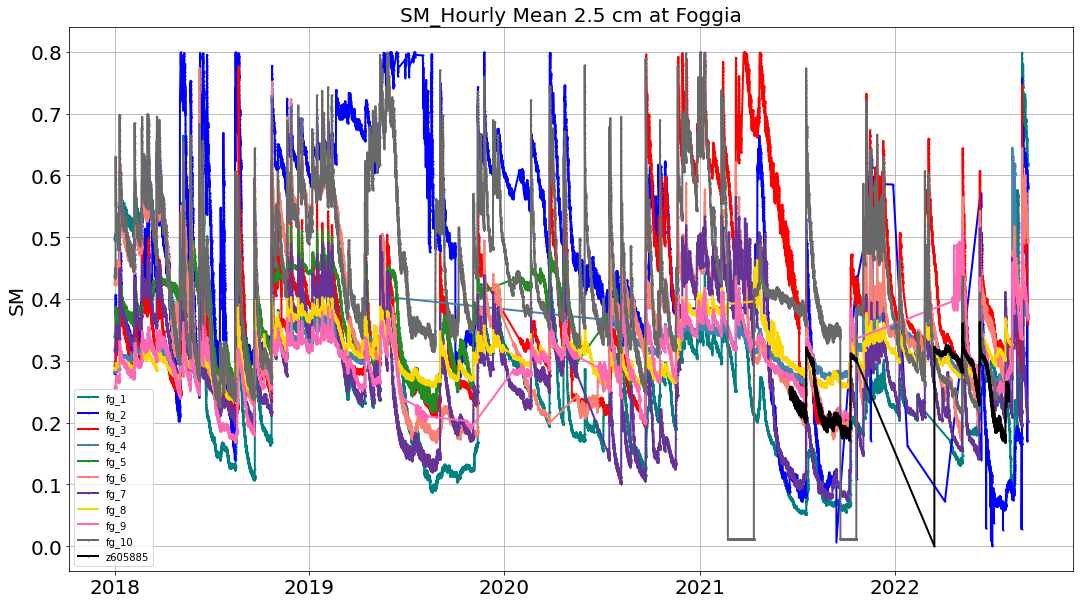

In [38]:
plt.title('SM_Hourly Mean 2.5 cm at Foggia', size=20)
plt.grid()
plt.plot(fd_dt_sg11xk,'teal',label='fg_1',marker='o', markerfacecolor='teal', markeredgecolor='teal', markersize=1)
plt.plot(fd_dt_sg22xk, 'blue',label='fg_2',marker='o', markerfacecolor='blue', markeredgecolor='blue', markersize=1)
plt.plot(fd_dt_sg33xk, 'red',label='fg_3',marker='o', markerfacecolor='red', markeredgecolor='red', markersize=1)
plt.plot(fd_dt_sg44x, 'steelblue',label='fg_4',marker='o', markerfacecolor='steelblue', markeredgecolor='steelblue', markersize=1)
plt.plot(fd_dt_sg55xk, 'forestgreen',label='fg_5',marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markersize=1)
plt.plot(fd_dt_sg66x, 'salmon',label='fg_6',marker='o', markerfacecolor='salmon', markeredgecolor='salmon', markersize=1)
plt.plot(fd_dt_sg77x, 'rebeccapurple',label='fg_7',marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=1)
plt.plot(fd_dt_sg88x, 'gold',label='fg_8',marker='o', markerfacecolor='gold', markeredgecolor='gold', markersize=1)
plt.plot(fd_dt_sg99x, 'hotpink',label='fg_9',marker='o', markerfacecolor='hotpink', markeredgecolor='hotpink', markersize=1)
plt.plot(fd_dt_sg10xk, 'dimgray',label='fg_10',marker='o', markerfacecolor='dimgray', markeredgecolor='dimgray', markersize=1)
plt.plot(fd_dt_sg111x, 'black',label='z605885',marker='o', markerfacecolor='black', markeredgecolor='black', markersize=1)

plt.ylabel('SM',fontsize=20)


plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();


In [34]:
from scipy import stats
import math


### CONCATENATE THE NEW OUTPUTS FOR THE CALCULATION OF:
* MRD
* STD
* RMSE

In [39]:
new_df_addzz = pd.concat([fd_dt_sg11xk,fd_dt_sg22xk,fd_dt_sg33xk,fd_dt_sg44x,fd_dt_sg55xk,fd_dt_sg66x,fd_dt_sg77x,fd_dt_sg88x,fd_dt_sg99x,fd_dt_sg10xk,fd_dt_sg111x], axis=1)
new_df_addzz.columns = ['fg1','fg2','fg3','fg4','fg5','fg6','fg7','fg8','fg9','fg10','z605885']
new_df_addzz

,fg1,fg2,fg3,fg4,fg5,fg6,fg7,fg8,fg9,fg10,z605885
DATE_TIME,,,,,,,,,,,
2018-01-01 00:00:00,0.497444,0.279866,0.292328,0.281774,0.339303,0.424385,0.317155,0.286411,0.254876,0.436161,NaN
2018-01-01 01:00:00,0.496932,0.279866,0.291902,0.281705,0.338805,0.424165,0.316787,0.286348,0.254695,0.435426,NaN
2018-01-01 02:00:00,0.496079,0.279361,0.291264,0.281705,0.338142,0.423725,0.316234,0.286536,0.254876,0.434936,NaN
2018-01-01 03:00:00,0.495226,0.279109,0.290838,0.281567,0.337644,0.423065,0.315498,0.286536,0.254514,0.434446,NaN
2018-01-01 04:00:00,0.494884,0.279109,0.290838,0.281360,0.337478,0.422626,0.315130,0.286411,0.254514,0.433957,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07 06:00:00,0.617391,0.580809,0.371065,0.366834,NaN,0.493656,0.201701,NaN,0.369101,NaN,NaN
2022-09-07 07:00:00,0.616196,0.579800,0.362128,0.367041,NaN,0.493216,0.201701,NaN,0.368739,NaN,NaN
2022-09-07 08:00:00,0.616026,0.579548,0.358829,0.367938,NaN,0.491896,0.201701,NaN,0.368558,NaN,NaN


In [41]:

new_df_addzz.fg1

DATE_TIME
2018-01-01 00:00:00    0.497444
2018-01-01 01:00:00    0.496932
2018-01-01 02:00:00    0.496079
2018-01-01 03:00:00    0.495226
2018-01-01 04:00:00    0.494884
                         ...   
2022-09-07 06:00:00    0.617391
2022-09-07 07:00:00    0.616196
2022-09-07 08:00:00    0.616026
2022-09-07 09:00:00         NaN
2022-09-07 10:00:00         NaN
Freq: H, Name: fg1, Length: 41051, dtype: float64

In [42]:
mrd_mean=new_df_addzz.mean()
mrd_mean

fg1        0.261846
fg2        0.452499
fg3        0.379058
fg4        0.318729
fg5        0.377620
fg6        0.349988
fg7        0.274128
fg8        0.310726
fg9        0.300257
fg10       0.411731
z605885    0.255363
dtype: float64

In [44]:
mrd_sg1=(new_df_addzz.fg1-mrd_mean.fg1)
mrd_sg2=(new_df_addzz.fg2-mrd_mean.fg2)
mrd_sg3=(new_df_addzz.fg3-mrd_mean.fg3)
mrd_sg4=(new_df_addzz.fg4-mrd_mean.fg4)
mrd_sg5=(new_df_addzz.fg5-mrd_mean.fg5)
mrd_sg6=(new_df_addzz.fg6-mrd_mean.fg6)
mrd_sg7=(new_df_addzz.fg7-mrd_mean.fg7)
mrd_sg8=(new_df_addzz.fg8-mrd_mean.fg8)
mrd_sg9=(new_df_addzz.fg9-mrd_mean.fg9)
mrd_sg10=(new_df_addzz.fg10-mrd_mean.fg10)
mrd_sg11=(new_df_addzz.z605885-mrd_mean.z605885)


In [46]:
mrd_mean_sg11=mrd_sg1.mean()
mrd_mean_sg22=mrd_sg2.mean()
mrd_mean_sg33=mrd_sg3.mean()
mrd_mean_sg44=mrd_sg4.mean()
mrd_mean_sg55=mrd_sg5.mean()
mrd_mean_sg66=mrd_sg6.mean()
mrd_mean_sg77=mrd_sg7.mean()
mrd_mean_sg88=mrd_sg8.mean()
mrd_mean_sg99=mrd_sg9.mean()
mrd_mean_sg100=mrd_sg10.mean()
mrd_mean_sg111=mrd_sg11.mean()

In [48]:
std_sg1=mrd_sg1.std()
std_sg2=mrd_sg2.std()
std_sg3=mrd_sg3.std()
std_sg4=mrd_sg4.std()
std_sg5=mrd_sg5.std()
std_sg6=mrd_sg6.std()
std_sg7=mrd_sg7.std()
std_sg8=mrd_sg8.std()
std_sg9=mrd_sg9.std()
std_sg10=mrd_sg10.std()
std_sg11=mrd_sg11.std()


In [50]:
rmse_rd_sg1=(np.sqrt((mrd_mean_sg11 **2)+std_sg1))
rmse_rd_sg2=(np.sqrt((mrd_mean_sg22 **2)+std_sg2))
rmse_rd_sg3=(np.sqrt((mrd_mean_sg33 **2)+std_sg3))
rmse_rd_sg4=(np.sqrt((mrd_mean_sg44 **2)+std_sg4))
rmse_rd_sg5=(np.sqrt((mrd_mean_sg55 **2)+std_sg5))
rmse_rd_sg6=(np.sqrt((mrd_mean_sg66 **2)+std_sg6))
rmse_rd_sg7=(np.sqrt((mrd_mean_sg77 **2)+std_sg7))
rmse_rd_sg8=(np.sqrt((mrd_mean_sg88 **2)+std_sg8))
rmse_rd_sg9=(np.sqrt((mrd_mean_sg99 **2)+std_sg9))
rmse_rd_sg10=(np.sqrt((mrd_mean_sg100 **2)+std_sg10))
rmse_rd_sg11=(np.sqrt((mrd_mean_sg111 **2)+std_sg11))


(-0.6, 0.6)

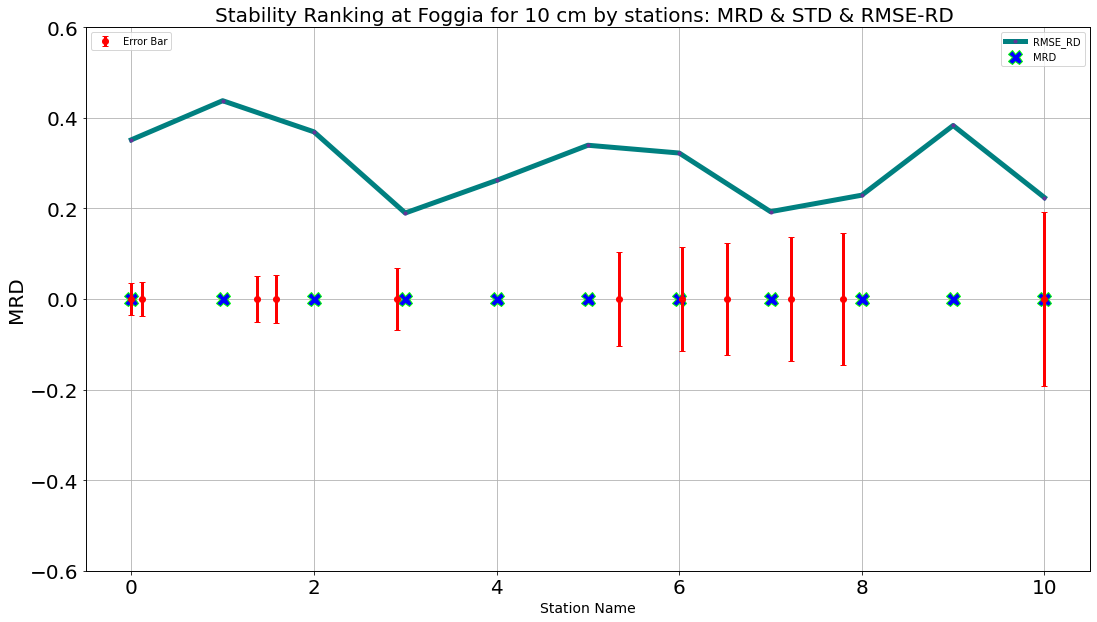

In [51]:
fig, ax1 = plt.subplots()
plt.title('Stability Ranking at Foggia for 10 cm by stations: MRD & STD & RMSE-RD ', size=20)

column_std = std_sg1,std_sg2,std_sg3,std_sg4,std_sg5,std_sg6,std_sg7,std_sg8,std_sg9,std_sg10,std_sg11
column_mrd= mrd_mean_sg11,mrd_mean_sg22,mrd_mean_sg33,mrd_mean_sg44,mrd_mean_sg55,mrd_mean_sg66,mrd_mean_sg77,mrd_mean_sg88,mrd_mean_sg99,mrd_mean_sg100,mrd_mean_sg111
column_rmse_rd = rmse_rd_sg1,rmse_rd_sg2,rmse_rd_sg3,rmse_rd_sg4,rmse_rd_sg5,rmse_rd_sg6,rmse_rd_sg7,rmse_rd_sg8,rmse_rd_sg9,rmse_rd_sg10,rmse_rd_sg11

color2='black'
ax1.plot(column_rmse_rd,'teal',linewidth=5, marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=3, label='RMSE_RD')
ax1.plot(column_mrd,'gold',marker='X', markerfacecolor='blue', markeredgecolor='lime', markersize=14,linestyle="", label='MRD')
ax1.legend(loc='upper left');
ax1.set_xlabel("Station Name", fontsize=14,color=color2 )
ax1.set_ylabel("MRD", fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax1.grid()
ax1.legend()

ax2 = ax1.twiny()
ax2.errorbar(column_rmse_rd,column_mrd,yerr = column_std,fmt='o',ecolor = 'red',color='red',elinewidth=3,capsize=3,label='Error Bar')
plt.xticks([])
ax2.legend()

ax2.legend(loc='upper left');

ax2.set_ylim([-0.6,0.6])

